In [612]:
import numpy as np
import math
import random
from scipy import misc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### Load Image

In [613]:
image = misc.imread('./img/ironman2.png') 
image.shape, image.dtype
img_height = image.shape[0]
img_width = image.shape[1]

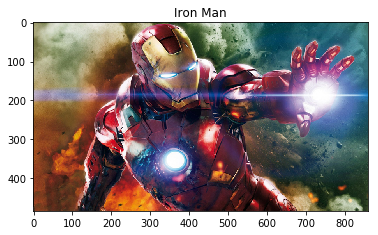

In [614]:
plt.imshow(image)
plt.title('Iron Man')
plt.show()

### Uniformly Sample 5000 locations

In [615]:
def doSampling(image, sampleCount):
    img_height = image.shape[0]
    img_width = image.shape[1]
        
    location_range = range(img_height * img_width)
     
    samples = []
    coordinations = []
        
    for location in random.sample(location_range, sampleCount):
        x = location % img_width
        y = location // img_width
        samples.append(image[y, x])
        coordinations.append([y, x])
        
    samples = np.array(samples, np.dtype(float))
    return samples, coordinations

In [616]:
def getSampledImage(image, coordinations, background):
    img_height = image.shape[0]
    img_width = image.shape[1]
    
    newImage = np.zeros([img_height,img_width,3] ,dtype=np.uint8)
    if background == 'white':
        newImage.fill(255)
    elif background == 'black':
        newImage.fill(0)
    
    for [y, x] in coordinations:
        newImage[y, x] = image[y, x]
            
    return newImage

In [617]:
samples, coordinations = doSampling(image, 5000)

In [618]:
sampledImage = getSampledImage(image, coordinations, 'black')

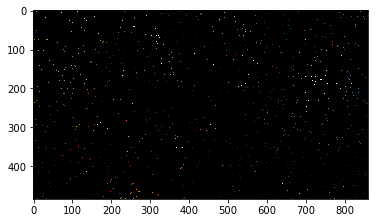

In [619]:
plt.imshow(sampledImage)
plt.show()

In [620]:
sampledImage = getSampledImage(image, coordinations, 'white')

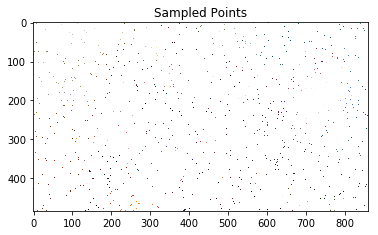

In [621]:
plt.imshow(sampledImage)
plt.title('Sampled Points')
plt.show()

### Preprocessing the output

In [622]:
def rescaleSamples(samples):
    rescaledSamples = []
    for index in range(samples.shape[0]):
        rescaledSamples.append(samples[index] / float(255))
    return rescaledSamples

In [623]:
rescaledSamples = rescaleSamples(samples)

### Build Final Image

In [638]:
def randomForestApproximation(max_depth, num_tree, samples, coordinations, enableBootstrap):
    predictLocations = []

    for y in range(img_height):
        for x in range(img_width):
            predictLocations.append([y, x])
    if enableBootstrap:
        rf = RandomForestRegressor(max_depth=max_depth, n_estimators=num_tree, bootstrap=True)
    else:
        rf = RandomForestRegressor(max_depth=max_depth, n_estimators=num_tree)
    rf.fit(coordinations, samples)
    approximation = rf.predict(predictLocations).reshape(img_height, img_width, 3)

    return approximation

In [639]:
def testDifferentDepths(depths, num_trees):
    count = len(depths)
    plt.figure(figsize=(20, 20))

    for i in range(count):
        depth = depths[i]
        plt.subplot(math.ceil(count/2), 2, i + 1)
        approximation = randomForestApproximation(depth, num_trees, rescaledSamples, coordinations, False)
        plt.imshow(approximation)
        plt.title('Depth = ' + str(depth))

    plt.show()

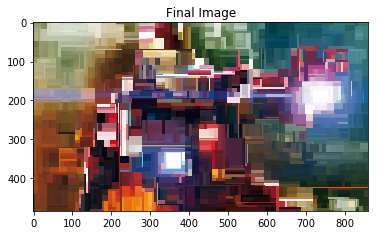

In [640]:
plt.imshow(randomForestApproximation(20, 1, rescaledSamples, coordinations, False))
plt.title('Final Image')
plt.show()

### Test Different Depth Values

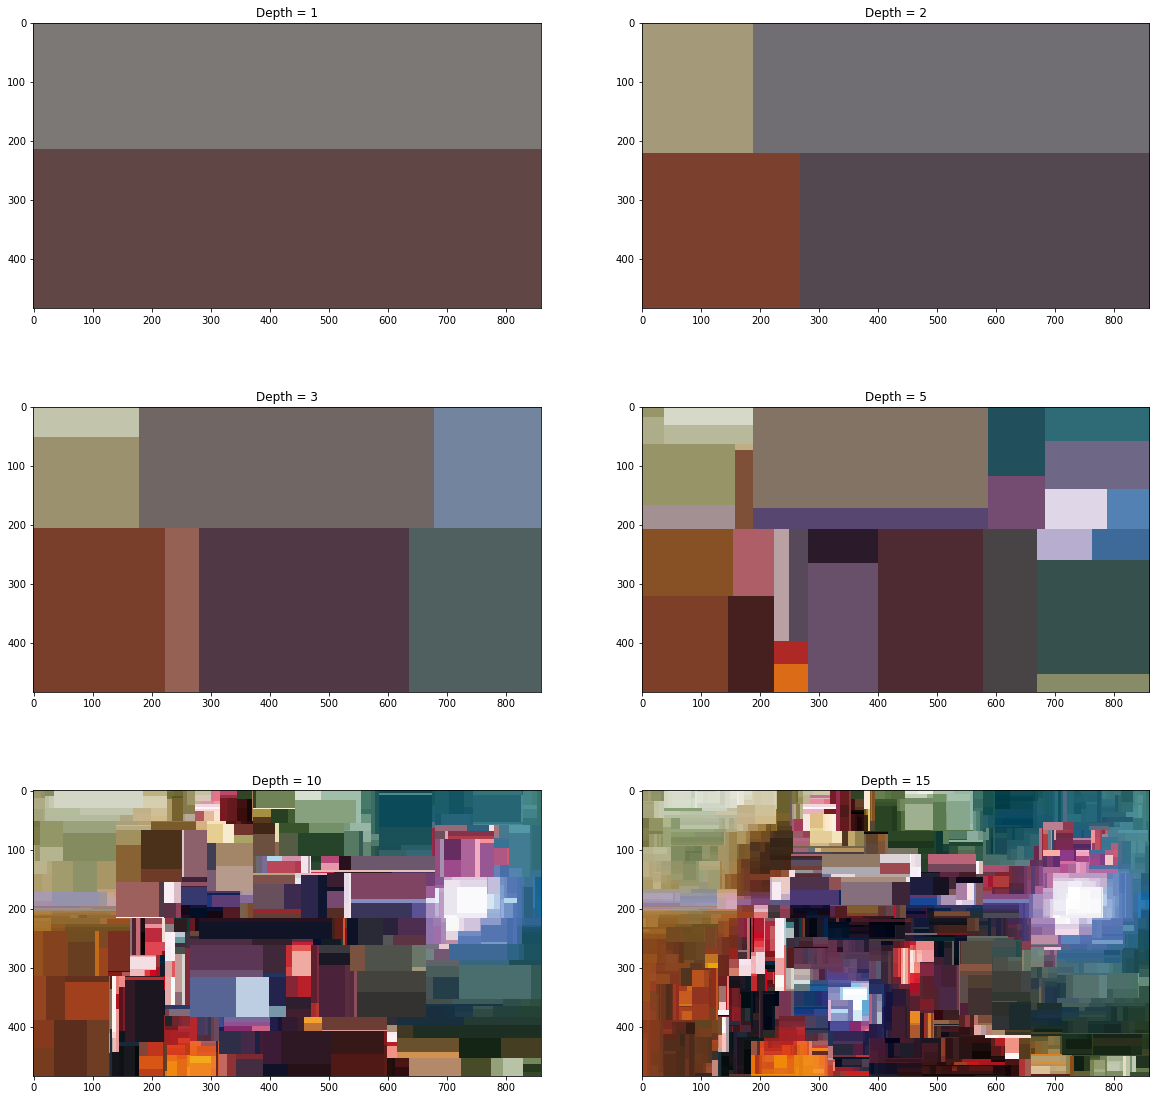

In [641]:
testDifferentDepths([1, 2, 3, 5, 10, 15], 1)

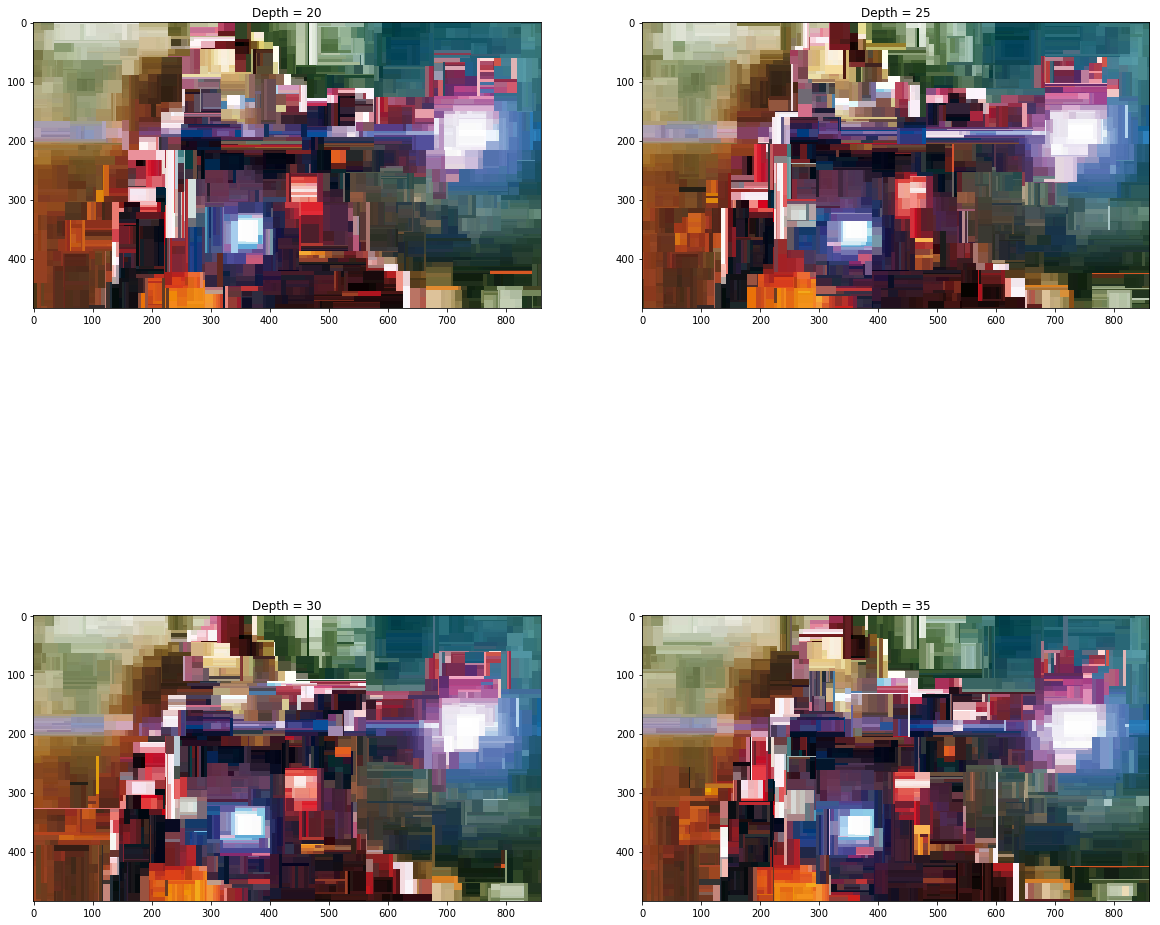

In [642]:
testDifferentDepths([20, 25, 30, 35], 1)

### Test Different Number of Trees

In [643]:
def testDifferentNumOfTrees(depth, nums):
    count = len(nums)
    plt.figure(figsize=(20, 20))

    for i in range(count):
        num_trees = nums[i]
        plt.subplot(math.ceil(count/2), 2, i + 1)
        approximation = randomForestApproximation(depth, num_trees, rescaledSamples, coordinations, False)
        plt.imshow(approximation)
        plt.title('Num of Trees = ' + str(num_trees))

    plt.show()

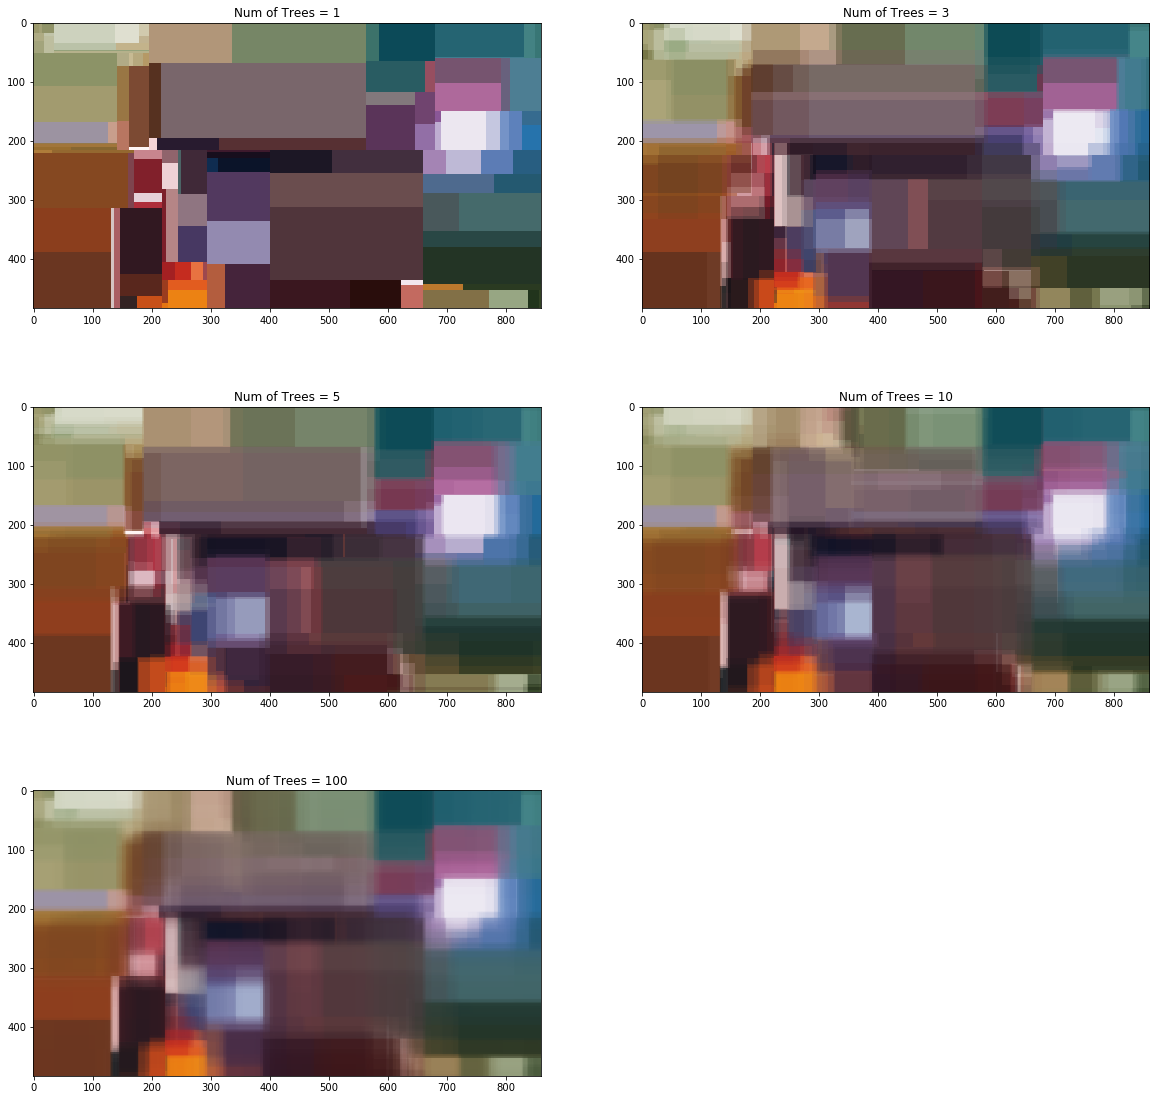

In [644]:
testDifferentNumOfTrees(7, [1, 3, 5, 10, 100])

### Experiment with different pruning strategies

In [631]:
def testDifferentPruning(depth, num_trees, rescaledSamples, coordinations, enableBootstrap):
    approximation = randomForestApproximation(depth, num_trees, rescaledSamples, coordinations, enableBootstrap)
    plt.imshow(approximation)
    plt.title('Num of Trees = ' + str(num_trees) + '  Depth = ' + str(depth) + ' Bootstrap = ' + str(enableBootstrap))
    plt.show()

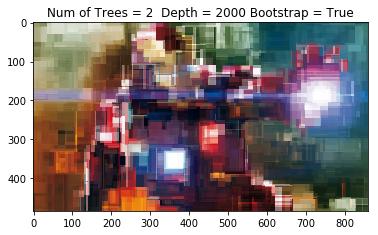

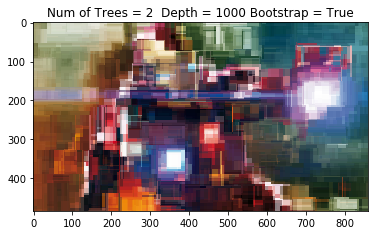

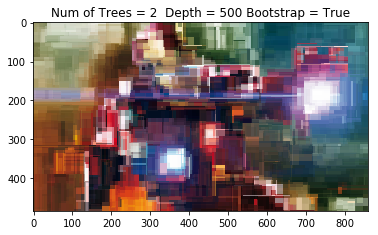

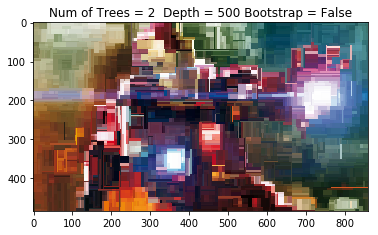

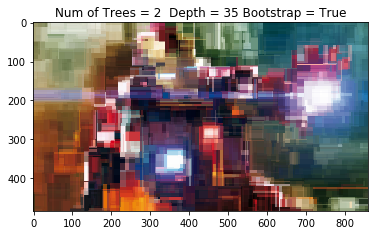

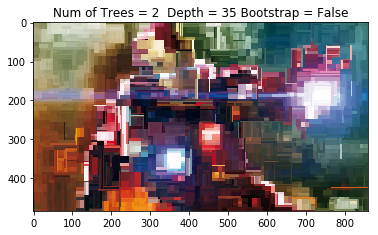

In [632]:
testDifferentPruning(2000, 2, rescaledSamples, coordinations, True)
testDifferentPruning(1000, 2, rescaledSamples, coordinations, True)
testDifferentPruning(500, 2, rescaledSamples, coordinations, True)
testDifferentPruning(500, 2, rescaledSamples, coordinations, False)
testDifferentPruning(35, 2, rescaledSamples, coordinations, True)
testDifferentPruning(35, 2, rescaledSamples, coordinations, False)

### KNN - 1NN

In [633]:
def testKNN(k, samples, coordinations):
    predictLocations = []
    for y in range(img_height):
        for x in range(img_width):
            predictLocations.append([y, x])

    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(coordinations, samples)
    approximation = knn.predict(predictLocations).reshape(img_height, img_width, 3)
    
    return approximation

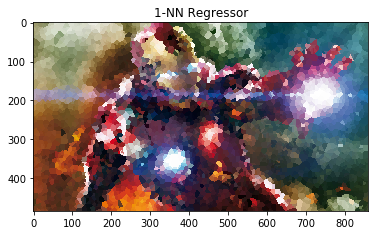

In [634]:
approximation = testKNN(1, rescaledSamples, coordinations)
plt.imshow(approximation)
plt.title('1-NN Regressor')
plt.show()